In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.randn(1000,2)
X[:500,:]+=5

In [9]:
Y = np.vstack(([[1]]*500,[[0]]*500))

In [10]:
X.shape

(1000, 2)

In [11]:
Y.shape

(1000, 1)

In [12]:
Data = np.hstack((X,Y))

In [13]:
np.random.shuffle(Data)

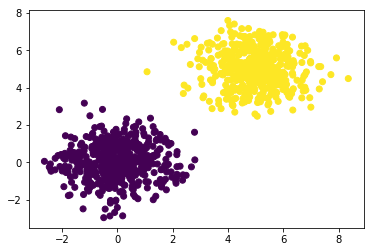

In [14]:
plt.scatter(Data[:,[0]],Data[:,[1]],c=Data[:,[-1]])

In [16]:
Data = np.hstack((np.ones((1000,1)),Data))

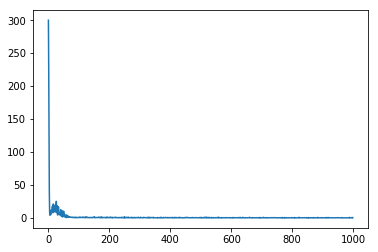

In [31]:
epochs = 1000
eta = 1e-3
Vel = np.zeros((3,1))
w = np.random.randn(3,1)
mu = 0.9
batch = 50
Costs = []
for _ in range(epochs):
    Sample=Data[np.random.choice(np.arange(Data.shape[0]),size=batch,replace=False)]
    # False update
    w+=Vel
    # Forward propagation at Lookahead
    phat = 1/(1+np.exp(-Sample[:,:3]@w))
    CEC = -np.sum(Sample[:,[-1]]*np.log(phat)+(1-Sample[:,[-1]])*np.log(1-phat))
    Costs.append(CEC)
    #print("Current Loss: {}".format(CEC))
    # Backpropagation at lookahead
    gradw = Sample[:,:3].T@(phat-Sample[:,[-1]])
    # return to original position
    w-=Vel
    # update velocity based on the lookahead gradient
    Vel=mu*Vel-eta*gradw
    # true weight update
    w+=Vel
    # True forward propagation to calculate Cost
#     phat = 1/(1+np.exp(-Sample[:,:3]@w))
#     CEC = -np.sum(Sample[:,[-1]]*np.log(phat)+(1-Sample[:,[-1]])*np.log(1-phat))
#     Costs.append(CEC)
    #print("Current Loss: {}".format(CEC))
    
plt.plot(Costs)